In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# for auto-reloading extenrnal modules
%load_ext autoreload
%autoreload 2

In [10]:
import csv

#unixReviewTime = 0
#reviewTime = 1
#ratings = 2
#reviewText = 3
#reviewerID = 4
#productID = 5

unixReviewTime = []
reviewTime = []
ratings = []
reviewText = []
reviewerID = []
productID = []

with open('sportsTrain.csv', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=' ', quotechar='|')
    for row in reader:
        unixReviewTime.append(int(row[0]))
        reviewTime.append(row[1])
        ratings.append(int(row[2]))
        reviewText.append(row[3])
        reviewerID.append(row[4])
        productID.append(row[5])
        

In [12]:
reviewTextLength = [len(r) for r in reviewText]

Text(0.5, 0, 'Review Length in Characters')

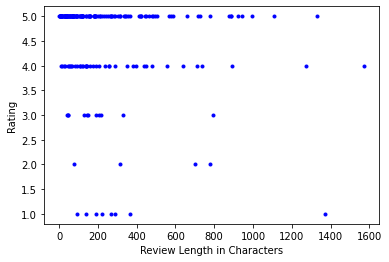

In [17]:
plt.plot(reviewTextLength[:200], ratings[:200], 'b.')
plt.ylabel('Rating')
plt.xlabel('Review Length in Characters')